In [1]:
import sys
import skimage
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import dask
import dask.array as da
import numpy as np
from dask.dot import dot_graph
from dask.distributed import Client, LocalCluster, progress
from dask.distributed import Scheduler
from skimage.filters import threshold_otsu
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage import data

In [2]:
counter = 0
client = Client()
print client

distributed.deploy.local - INFO - To start diagnostics web server please install Bokeh


<Client: scheduler='tcp://127.0.0.1:8786' processes=4 cores=4>


In [3]:
def otsu_thresholding(image):
	thresh = threshold_otsu(image)
	binary = image > thresh
	return binary

def show_images(image,L):
	fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
	ax = axes.ravel()

	ax[0] = plt.subplot(1, 2, 1, adjustable='box-forced')
	ax[1] = plt.subplot(1, 2, 2, sharex=ax[0], sharey=ax[0], adjustable='box-forced')

	ax[0].imshow(image, cmap=plt.cm.gray)
	ax[0].set_title('Original')
	ax[0].axis('off')

	ax[1].imshow(L, cmap=plt.cm.gray)
	ax[1].set_title('Thresholded')
	ax[1].axis('off')
	plt.show()

In [4]:
def array_images():
	custom_imread = (skimage.io.imread)
	images = [custom_imread('/Users/nivethamahalakshmibalasamy/Documents/ECI-PolarScience/dask_stuff/seal/seal%d.jpeg' %i) for i in range(1,10)]
	L1 = client.map(otsu_thresholding, images)
	print L1
	print "going to client.gather function"
	results = client.gather(L1)
	progress(results)
	print "gathered results"

	for i, r in zip(images, results):
		show_images(i,r)

[<Future: status: pending, key: otsu_thresholding-cb930bda60a9b0ed1cac465ad2de527a>, <Future: status: pending, key: otsu_thresholding-8ce15e87701d3453588f2ed6efdb3af3>, <Future: status: pending, key: otsu_thresholding-f42ba64c3a8f29f342c26ddd4321783e>, <Future: status: pending, key: otsu_thresholding-f42ba64c3a8f29f342c26ddd4321783e>, <Future: status: pending, key: otsu_thresholding-7ad8183847e57c8bdb947f17211ffefa>, <Future: status: pending, key: otsu_thresholding-cb930bda60a9b0ed1cac465ad2de527a>, <Future: status: pending, key: otsu_thresholding-c3b349be34e648ce242bb02f979753e7>, <Future: status: pending, key: otsu_thresholding-45580369e41af41929191016510d4586>, <Future: status: pending, key: otsu_thresholding-5da28247757aedf5bb92be9e536e85a6>]
going to client.gather function
gathered results


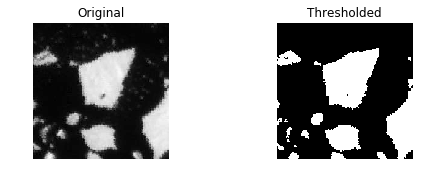

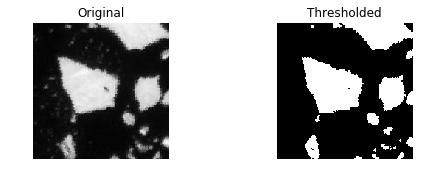

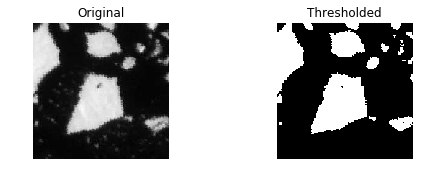

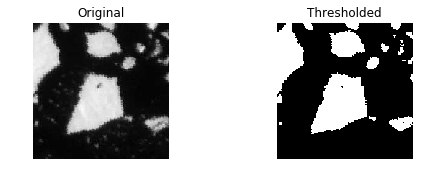

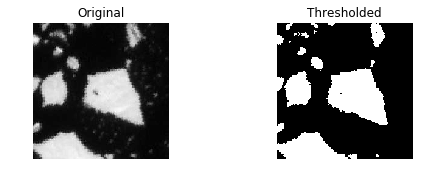

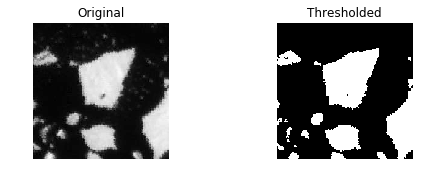

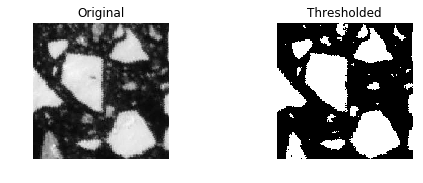

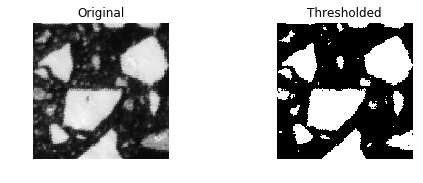

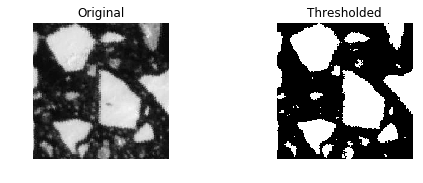

In [5]:
if __name__ == '__main__':
	array_images()